# NRQS

The dynamial equation for density and polarity fields of species $S\in\{A, B\}$ read
$$
\partial_t \rho_S = -\nabla\cdot (v_S \mathbf{p}_S) + D_t \Delta \rho_S, \\
\partial_t \mathbf{p}_S = \frac{v_S}{16 D_r} \Delta(v_S\mathbf{p}_S) - \frac{1}{2}\nabla(v_S\rho_S) - D_r \mathbf{p}_S+D_t\Delta \mathbf{p}_S +\mathbf{g}(v_S, \mathbf{p}_S).
$$
Here, $v_S$ is determined by
$$
v_S(\rho_A(\mathbf{r}), \rho_B(\mathbf{r})) = \bar{v}_{S} \tilde{v}_{SA}(\rho_A(\mathbf{r}))\tilde{v}_{SB}(\rho_B(\mathbf{r})),
$$
with
$$
\begin{aligned}
\tilde{v}_{SA}(\rho_A(\mathbf{r})) &= 1 + \kappa \tanh \left(
		\frac{\eta_{SA}}{\kappa}\frac{\rho_A(\mathbf{r})-\bar{\rho}_A}{\rho_0}
	\right),\\
\tilde{v}_{SB}(\rho_B(\mathbf{r})) &= 1 + \kappa \tanh \left(
		\frac{\eta_{SB}}{\kappa}\frac{\rho_B(\mathbf{r})-\bar{\rho}_B}{\rho_0}
	\right).
\end{aligned}
$$

The nonlinear term $\mathbf{g}(v, \mathbf{p})$ reads
$$
\mathbf{g}(v, \mathbf{p})=\frac{1}{8D_r} \left[\nabla(v\mathbf{p})\right]_{\rm ST} \cdot \nabla v,
$$
where $[\mathbf{A}]_{\rm ST}\equiv \frac{1}{2}\left[\mathbf{A}+\mathbf{A}^T-\mathbf{I}\mathrm{Tr}(\mathbf{A})\right]$, such that
$$
\mathbf{g}(v,\mathbf{p}) = \frac{1}{16D_r}\begin{pmatrix}
    g_1 \partial_x + g_2 \partial_y \\
    g_2 \partial_x - g_1 \partial_y
\end{pmatrix}v,
$$
with
$$
g_1 = \partial_x(vp_x) - \partial_y(vp_y), \\
g_2 = \partial_x(vp_y) + \partial_y(vp_x).
$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from NRQS import show_fields


def get_tilde_v_XY(eta_XY, rho_Y, bar_rho_Y, kappa=0.7):
    return 1 + kappa * np.tanh(eta_XY/kappa * (rho_Y - bar_rho_Y))

def get_tilde_v(eta_AA, eta_AB, eta_BA, eta_BB, rho_A, rho_B, bar_rho_A, bar_rho_B, kappa=0.7):
    drho_A = rho_A - bar_rho_A
    drho_B = rho_B - bar_rho_B
    inv_kappa = 1. / kappa
    v_AA = 1 + kappa * np.tanh(eta_AA * inv_kappa * drho_A)
    v_AB = 1 + kappa * np.tanh(eta_AB * inv_kappa * drho_B)
    v_BA = 1 + kappa * np.tanh(eta_BA * inv_kappa * drho_A)
    v_BB = 1 + kappa * np.tanh(eta_BB * inv_kappa * drho_B)
    return v_AA, v_AB, v_BA, v_BB

def get_v_A(rho_A, rho_B, bar_rho_A, bar_rho_B, etaAA, etaAB, bar_v_A=1., kappa=0.7):
    v_AA = get_tilde_v_XY(etaAA, rho_A, bar_rho_A, kappa)
    v_AB = get_tilde_v_XY(etaAB, rho_B, bar_rho_B, kappa) 
    return bar_v_A * v_AA * v_AB

def get_v_B(rho_A, rho_B, bar_rho_A, bar_rho_B, etaBA, etaBB, bar_v_B=1., kappa=0.7):
    v_BA = get_tilde_v_XY(etaBA, rho_A, bar_rho_A, kappa)
    v_BB = get_tilde_v_XY(etaBB, rho_B, bar_rho_B, kappa)
    return bar_v_B * v_BA * v_BB

def get_v(rho, etaAA, etaAB, etaBA, etaBB, bar_rho_A=1, bar_rho_B=1, bar_v_A=1, bar_v_B=1, kappa=0.7):
    v_AA, v_AB, v_BA, v_BB = get_tilde_v(etaAA, etaAB, etaBA, etaBB, rho[0], rho[1], bar_rho_A, bar_rho_B, kappa)
    v = np.zeros_like(rho)
    v[0] = bar_v_A * v_AA * v_AB
    v[1] = bar_v_B * v_BA * v_BB
    return v

def get_tilde_v_XY_derive(eta_XY, tilde_v_XY, kappa=0.7):
    return eta_XY * (1 - ((tilde_v_XY - 1)/kappa)**2)

In Fourier space, the equations become
$$
\partial_t \tilde{\rho}_S = -i\left[k_x\widetilde{(v_S p_{x,S})} + k_y\widetilde{(v_S p_{y,S})}\right] - k^2 D_t \tilde{\rho}_S,\\
\partial_t \tilde{p}_{x,S} = \frac{1}{16D_r}\widetilde{v_S\Delta(v_S p_{x,S})} -\frac{i}{2}k_x \widetilde{(v_S \rho_S)} - D_r \tilde{p}_{x, S} - D_t k^2 \tilde{p}_{x,S} + \tilde{g}_x,\\
\partial_t \tilde{p}_{y,S} = \frac{1}{16D_r}\widetilde{v_S\Delta(v_S p_{y,S})} -\frac{i}{2}k_y \widetilde{(v_S \rho_S)} - D_r \tilde{p}_{y, S} - D_t k^2 \tilde{p}_{y,S} + \tilde{g}_y,
$$
where $k^2 = k_x^2 + k_y^2$.

In [8]:
def get_freq(Nx, Ny, spacing):
    ky_1d = np.zeros(Ny)
    kx_1d = np.zeros(Nx // 2 + 1)
    for i in range(Ny):
        if i < Ny // 2:
            ky_1d[i] = i / (Ny * spacing) * np.pi * 2
        else:
            ky_1d[i] = (i - Ny) / (Ny * spacing) * np.pi * 2
    for i in range(Nx // 2 + 1):
        kx_1d[i] = i / (Nx * spacing) * np.pi * 2
    kxx, kyy = np.meshgrid(kx_1d, ky_1d)
    kx = np.array([kxx, kxx])
    ky = np.array([kyy, kyy])
    k2 = kx ** 2 + ky ** 2
    return kx, ky, k2

def get_freq_pad(Nx, Ny, spacing):
    Ky = int(Ny / 2 * 3)
    Kx_old = Nx // 2 + 1
    Kx = int(Kx_old / 2 * 3)
    ky_1d_pad = np.zeros(Ky)
    kx_1d_pad = np.zeros(Kx)

    Ny_pad = Ky
    Nx_pad = (Kx - 1) * 2

    for i in range(Ky):
        if i < Ky // 2:
            ky_1d_pad = i / (Ny_pad * spacing) * np.pi * 2
        else:
            ky_1d_pad = (i-Ny_pad) / (Ny_pad * spacing) * np.pi * 2
    for i in range(Kx):
        kx_1d_pad[i] = i / (Nx_pad * spacing) * np.pi * 2
    kxx_pad, kyy_pad = np.meshgrid(kx_1d_pad, ky_1d_pad)
    kx_pad = np.array([kxx_pad, kxx_pad])
    ky_pad = np.array([kyy_pad, kyy_pad])
    k2_pad = kx_pad ** 2 + ky_pad ** 2
    return kx_pad, ky_pad, k2_pad


def zeros_pad(u):
    Kx = u.shape[-1]
    Ky = u.shape[-2]

    Kx_pad = int(Kx / 2 * 3)
    Ky_pad = int(Ky / 2 * 3)
    
    u_pad = np.zeros((u.shape[0], Ky_pad, Kx_pad), np.complex128)
    u_pad[:, :Ky//2, :Kx] = u[:, :Ky//2, :]
    u_pad[:, Ky_pad - Ky//2:, :Kx] = u[:, Ky//2:, :]
    return u_pad


def dealias_product(u_pad, v_pad, Kx, Ky):
    prod_hat_pad = np.fft.rfft2(u_pad * v_pad)
    Ky_pad = prod_hat_pad.shape[-2]
    Kx_pad = prod_hat_pad.shape[-1]
    prod_hat = np.zeros((u_pad.shape[0], Ky, Kx), np.complex128)

    prod_hat[:, :Ky//2, :] = prod_hat_pad[:, :Ky//2, :Kx]
    prod_hat[:, Ky//2:, :] = prod_hat_pad[:, Ky_pad-Ky//2:, :Kx]

    Nx_Ny = (2 * Kx - 1) * Ky
    Nx_pad_Ny_pad = (2 * Kx_pad - 1) * Ky_pad
    prod_hat *= (Nx_pad_Ny_pad / Nx_Ny)

    return prod_hat


dt = 5e-4
spacing = 0.1
Nx = 128 # Nx and Ny should be even
Ny = 16
Lx = Nx * spacing
Ly = Ny * spacing

kx, ky, k2 = get_freq(Nx, Ny, spacing)

rho_A0 = 1
rho_B0 = 1
bar_rho_A = 1
bar_rho_B = 1

eta_AA = eta_BB = 0
eta_AB = 1
eta_BA = -eta_AB

Dr = 0.1
Dt = 0.01

seed = 2104
np.random.seed(seed)


In [9]:
def ini_rand(n_frame):
    rho = np.zeros((2, Ny, Nx))
    rho[0] =  rho_A0 + (np.random.rand(Ny, Nx) - 0.5) * 0.01
    rho[1] =  rho_B0 + (np.random.rand(Ny, Nx) - 0.5) * 0.01
    px = (np.random.rand(2, Ny, Nx) - 0.5) * 0.001
    py = (np.random.rand(2, Ny, Nx) - 0.5) * 0.001
    existed_frames = 0
    rho_arr = np.zeros((n_frame, 2, Ny, Nx))
    px_arr = np.zeros_like(rho_arr)
    py_arr = np.zeros_like(rho_arr)
    t_arr = np.zeros(n_frame)
    return t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py


def ini_from_file(fname, n_frame):
    with np.load(fname, "r") as data:
        if data["rho_arr"].ndim == 4:
            rho = data["rho_arr"][-1]
            px = data["px_arr"][-1]
            py = data["py_arr"][-1]
        elif data["rho_arr"].ndim == 3:
            rho = data["rho_arr"]
            px = data["px_arr"]
            py = data["py_arr"]
        else:
            print("wrong dimension for input fields")
            sys.exit(1)
        existed_frames = data["t_arr"].size
        print("load", existed_frames, " frames from", fname)

        rho_arr = np.zeros((n_frame + existed_frames, 2, Ny, Nx))
        px_arr = np.zeros_like(rho_arr)
        py_arr = np.zeros_like(rho_arr)
        t_arr = np.zeros(n_frame + existed_frames)

        rho_arr[:existed_frames] = data["rho_arr"]
        px_arr[:existed_frames] = data["px_arr"]
        py_arr[:existed_frames] = data["py_arr"]
        t_arr[:existed_frames] = data["t_arr"]
    return t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py


def ini(n_frame, fin, mode):
    if mode == "rand":
        t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py = ini_rand(n_frame)
        show_fields(rho, px, py, 0, spacing)
    elif mode == "resume":
        t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py = ini_from_file(fin, n_frame)
        show_fields(rho, px, py, t_arr[existed_frames-1], spacing)
    return t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py


def eval_time_derivative(rho, rho_k, px, px_k, py, py_k, w_NL_g=True):
    v = get_v(rho, eta_AA, eta_AB, eta_BA, eta_BB, bar_rho_A, bar_rho_B)
    v_px_k = np.fft.rfft2(v * px)
    v_py_k = np.fft.rfft2(v * py)
    v_rho_k = np.fft.rfft2(v * rho)

    Delta_v_px = np.fft.irfft2(-k2 * v_px_k)
    Delta_v_py = np.fft.irfft2(-k2 * v_py_k)

    tmp1 = np.fft.rfft2(v * Delta_v_px / (16 * Dr))
    tmp2 = np.fft.rfft2(v * Delta_v_py / (16 * Dr))

    ikx_v_px_k = 1j * kx * v_px_k
    iky_v_py_k = 1j * ky * v_py_k
    if w_NL_g:
        ikx_v_py_k = 1j * kx * v_py_k
        iky_v_px_k = 1j * ky * v_px_k
        g1 = np.fft.irfft2(ikx_v_px_k - iky_v_py_k)
        g2 = np.fft.irfft2(ikx_v_py_k + iky_v_px_k)
        v_k = np.fft.rfft2(v)
        partial_x_v = np.fft.irfft2(1j * kx * v_k)
        partial_y_v = np.fft.irfft2(1j * ky * v_k)
        gx_k = np.fft.rfft2((g1 * partial_x_v + g2 * partial_y_v)/(16 * Dr))
        gy_k = np.fft.rfft2((g2 * partial_x_v - g1 * partial_y_v)/(16 * Dr))
    else:
        gx_k = 0
        gy_k = 0
    f_rho = -(ikx_v_px_k + iky_v_py_k + k2 * Dt * rho_k)
    f_px = tmp1 - 0.5j * kx * v_rho_k - Dr * px_k - Dt * k2 * px_k + gx_k
    f_py = tmp2 - 0.5j * ky * v_rho_k - Dr * py_k - Dt * k2 * py_k + gy_k
    return f_rho, f_px, f_py


def eval_time_derivative_p(v, rho, px, px_k, py, py_k, w_NL_g=True):
    v_px_k = np.fft.rfft2(v * px)
    v_py_k = np.fft.rfft2(v * py)
    v_rho_k = np.fft.rfft2(v * rho)

    Delta_v_px = np.fft.irfft2(-k2 * v_px_k)
    Delta_v_py = np.fft.irfft2(-k2 * v_py_k)

    tmp1 = np.fft.rfft2(v * Delta_v_px / (16 * Dr))
    tmp2 = np.fft.rfft2(v * Delta_v_py / (16 * Dr))

    ikx_v_px_k = 1j * kx * v_px_k
    iky_v_py_k = 1j * ky * v_py_k
    if w_NL_g:
        ikx_v_py_k = 1j * kx * v_py_k
        iky_v_px_k = 1j * ky * v_px_k
        g1 = np.fft.irfft2(ikx_v_px_k - iky_v_py_k)
        g2 = np.fft.irfft2(ikx_v_py_k + iky_v_px_k)
        v_k = np.fft.rfft2(v)
        partial_x_v = np.fft.irfft2(1j * kx * v_k)
        partial_y_v = np.fft.irfft2(1j * ky * v_k)
        gx_k = np.fft.rfft2((g1 * partial_x_v + g2 * partial_y_v)/(16 * Dr))
        gy_k = np.fft.rfft2((g2 * partial_x_v - g1 * partial_y_v)/(16 * Dr))
    else:
        gx_k = 0
        gy_k = 0
    f_px = tmp1 - 0.5j * kx * v_rho_k - Dr * px_k - Dt * k2 * px_k + gx_k
    f_py = tmp2 - 0.5j * ky * v_rho_k - Dr * py_k - Dt * k2 * py_k + gy_k
    return f_px, f_py

def eval_time_derivative_rho(v, rho_k, px, py):
    v_px_k = np.fft.rfft2(v * px)
    v_py_k = np.fft.rfft2(v * py)
    f_rho = -(1j * kx *v_px_k + 1j * ky * v_py_k + k2 * Dt * rho_k)
    return f_rho


def simEulerFS(rho, rho_k, px, px_k, py, py_k, w_NL_g=True):
    v = get_v(rho, eta_AA, eta_AB, eta_BA, eta_BB, bar_rho_A, bar_rho_B)
    f_px, f_py = eval_time_derivative_p(v, rho, px, px_k, py, py_k, w_NL_g)
    px_k_next = px_k + dt * f_px
    py_k_next = py_k + dt * f_py

    px_next = np.fft.irfft2(px_k_next)
    py_next = np.fft.irfft2(py_k_next)
    f_rho = eval_time_derivative_rho(v, rho_k, px_next, py_next)

    rho_k_next = rho_k + dt * f_rho
    rho_next = np.fft.irfft2(rho_k_next)
    return rho_next, rho_k_next, px_next, px_k_next, py_next, py_k_next


def exEulerFS(rho, rho_k, px, px_k, py, py_k, w_NL_g=True):
    f_rho, f_px, f_py = eval_time_derivative(rho, rho_k, px, px_k, py, py_k, w_NL_g)
    rho_k_next = rho_k + dt * f_rho
    px_k_next = px_k + dt * f_px
    py_k_next = py_k + dt * f_py

    rho_next = np.fft.irfft2(rho_k_next)
    px_next = np.fft.irfft2(px_k_next)
    py_next = np.fft.irfft2(py_k_next)

    return rho_next, rho_k_next, px_next, px_k_next, py_next, py_k_next


def simFS1(rho, rho_k, px, px_k, py, py_k, w_NL_g=True):
    v = get_v(rho, eta_AA, eta_AB, eta_BA, eta_BB, bar_rho_A, bar_rho_B)

    v_px_k = np.fft.rfft2(v * px)
    v_py_k = np.fft.rfft2(v * py)
    v_rho_k = np.fft.rfft2(v * rho)

    Delta_v_px = np.fft.irfft2(-k2 * v_px_k)
    Delta_v_py = np.fft.irfft2(-k2 * v_py_k)

    tmp1 = np.fft.rfft2(v * Delta_v_px / (16 * Dr))
    tmp2 = np.fft.rfft2(v * Delta_v_py / (16 * Dr))

    ikx_v_px_k = 1j * kx * v_px_k
    iky_v_py_k = 1j * ky * v_py_k
    if w_NL_g:
        ikx_v_py_k = 1j * kx * v_py_k
        iky_v_px_k = 1j * ky * v_px_k
        g1 = np.fft.irfft2(ikx_v_px_k - iky_v_py_k)
        g2 = np.fft.irfft2(ikx_v_py_k + iky_v_px_k)
        v_k = np.fft.rfft2(v)
        partial_x_v = np.fft.irfft2(1j * kx * v_k)
        partial_y_v = np.fft.irfft2(1j * ky * v_k)
        gx_k = np.fft.rfft2((g1 * partial_x_v + g2 * partial_y_v)/(16 * Dr))
        gy_k = np.fft.rfft2((g2 * partial_x_v - g1 * partial_y_v)/(16 * Dr))
    else:
        gx_k = 0
        gy_k = 0

    prefactor = 1 / (1 + dt * Dt * k2)
    # rho_k_next = rho_k - dt * (ikx_v_px_k + iky_v_py_k + k2 * Dt * rho_k)
    # px_k_next = px_k + dt * (tmp1 - 0.5j * kx * v_rho_k - Dr * px_k - Dt * k2 * px_k + gx_k)
    # py_k_next = py_k + dt * (tmp2 - 0.5j * ky * v_rho_k - Dr * py_k - Dt * k2 * py_k + gy_k)
    rho_k_next = prefactor * (rho_k - dt * (ikx_v_px_k + iky_v_py_k))

    # prefactor2 = 1 / (1 + dt * Dt * k2 + dt * Dr)
    # px_k_next = prefactor2 * (px_k + dt * (tmp1 - 0.5j * kx * v_rho_k + gx_k))
    # py_k_next = prefactor2 * (py_k + dt * (tmp2 - 0.5j * ky * v_rho_k + gy_k))
    px_k_next = prefactor * (px_k + dt * (tmp1 - 0.5j * kx * v_rho_k - Dr * px_k + gx_k))
    py_k_next = prefactor * (py_k + dt * (tmp2 - 0.5j * ky * v_rho_k - Dr * py_k + gy_k))

    rho_next = np.fft.irfft2(rho_k_next)
    px_next = np.fft.irfft2(px_k_next)
    py_next = np.fft.irfft2(py_k_next)

    return rho_next, rho_k_next, px_next, px_k_next, py_next, py_k_next


def run_exEulerFS(n_step, dn_out, mode="rand", folder="data", w_NL_g=True):
    fout = f"{folder}/L{Lx:g}_{Ly:g}_Dr{Dr:.3f}_Dt{Dt:g}_e{eta_AA:.3f}_{eta_BB:.3f}_J{eta_AB:.3f}_{eta_BA:.3f}_dx{spacing:g}_h{dt:g}_s{seed}.npz"
    n_frame = n_step // dn_out
    t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py = ini(n_frame, fout, mode)
    rho_k =  np.fft.rfft2(rho)
    px_k = np.fft.rfft2(px)
    py_k = np.fft.rfft2(py)

    i_frame = existed_frames
    for i in range(1, n_step+1):
        if i % dn_out == 0:
            rho_arr[i_frame] = rho
            px_arr[i_frame] = px
            py_arr[i_frame] = py
            t_cur = i * dt
            if existed_frames > 0:
                t_cur += t_arr[existed_frames-1]
            t_arr[i_frame] = t_cur
            show_fields(rho, px, py, t_cur, spacing)
            print(i, rho.min(), rho.max(), np.mean(rho))
            i_frame += 1
        rho, rho_k, px, px_k, py, py_k = exEulerFS(rho, rho_k, px, px_k, py, py_k, w_NL_g=w_NL_g)
    
    np.savez_compressed(fout, rho_arr=rho_arr, px_arr=px_arr, py_arr=py_arr, t_arr=t_arr)



def run_simEulerFS(n_step, dn_out, mode="rand", folder="data", w_NL_g=True):
    fout = f"{folder}/L{Lx:g}_{Ly:g}_Dr{Dr:.3f}_Dt{Dt:g}_e{eta_AA:.3f}_{eta_BB:.3f}_J{eta_AB:.3f}_{eta_BA:.3f}_dx{spacing:g}_h{dt:g}_s{seed}.npz"
    n_frame = n_step // dn_out
    t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py = ini(n_frame, fout, mode)
    rho_k =  np.fft.rfft2(rho)
    px_k = np.fft.rfft2(px)
    py_k = np.fft.rfft2(py)

    i_frame = existed_frames
    for i in range(1, n_step+1):
        if i % dn_out == 0:
            rho_arr[i_frame] = rho
            px_arr[i_frame] = px
            py_arr[i_frame] = py
            t_cur = i * dt
            if existed_frames > 0:
                t_cur += t_arr[existed_frames-1]
            t_arr[i_frame] = t_cur
            show_fields(rho, px, py, t_cur, spacing)
            print(i, rho.min(), rho.max(), np.mean(rho))
            i_frame += 1
        rho, rho_k, px, px_k, py, py_k = simEulerFS(rho, rho_k, px, px_k, py, py_k, w_NL_g=w_NL_g)
    
    np.savez_compressed(fout, rho_arr=rho_arr, px_arr=px_arr, py_arr=py_arr, t_arr=t_arr)


def run_simFS1(n_step, dn_out, mode="rand", folder="data", w_NL_g=True):
    fout = f"{folder}/L{Lx:g}_{Ly:g}_Dr{Dr:.3f}_Dt{Dt:g}_e{eta_AA:.3f}_{eta_BB:.3f}_J{eta_AB:.3f}_{eta_BA:.3f}_dx{spacing:g}_h{dt:g}_s{seed}.npz"
    n_frame = n_step // dn_out
    t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py = ini(n_frame, fout, mode)
    rho_k =  np.fft.rfft2(rho)
    px_k = np.fft.rfft2(px)
    py_k = np.fft.rfft2(py)

    i_frame = existed_frames
    for i in range(1, n_step+1):
        if i % dn_out == 0:
            rho_arr[i_frame] = rho
            px_arr[i_frame] = px
            py_arr[i_frame] = py
            t_cur = i * dt
            if existed_frames > 0:
                t_cur += t_arr[existed_frames-1]
            t_arr[i_frame] = t_cur
            show_fields(rho, px, py, t_cur, spacing)
            print(i, rho.min(), rho.max(), np.mean(rho))
            i_frame += 1
        rho, rho_k, px, px_k, py, py_k = simFS1(rho, rho_k, px, px_k, py, py_k, w_NL_g=w_NL_g)
    np.savez_compressed(fout, rho_arr=rho_arr, px_arr=px_arr, py_arr=py_arr, t_arr=t_arr)


def exEulerFS_dealiased(rho_k, px_k, py_k, w_NL_g=False):
    rho = np.fft.irfft2(rho_k)
    v = get_v(rho, eta_AA, eta_AB, eta_BA, eta_BB, bar_rho_A, bar_rho_B)
    v_hat = np.fft.rfft2(v)

    v_hat_pad = zeros_pad(v_hat)
    px_hat_pad = zeros_pad(px_k)
    py_hat_pad = zeros_pad(py_k)
    rho_hat_pad = zeros_pad(rho_k)
    
    v_pad = np.fft.irfft2(v_hat_pad)
    px_pad = np.fft.irfft2(px_hat_pad)
    py_pad = np.fft.irfft2(py_hat_pad)
    rho_pad = np.fft.irfft2(rho_hat_pad)

    Kx = px_k.shape[-1]
    Ky = px_k.shape[-2]
    v_px_hat = dealias_product(v_pad, px_pad, Kx, Ky)
    v_py_hat = dealias_product(v_pad, py_pad, Kx, Ky)
    v_rho_hat = dealias_product(v_pad, rho_pad, Kx, Ky)

    Delta_v_px_pad = np.fft.irfft2(zeros_pad(-k2 * v_px_hat))
    Delta_v_py_pad = np.fft.irfft2(zeros_pad(-k2 * v_py_hat))

    v_Delta_v_px_hat = dealias_product(v_pad, Delta_v_px_pad, Kx, Ky)
    v_Delta_v_py_hat = dealias_product(v_pad, Delta_v_py_pad, Kx, Ky)

    ikx_v_px_hat = 1j * kx * v_px_hat
    iky_v_py_hat = 1j * ky * v_py_hat
    if w_NL_g:
        ikx_v_py_hat = 1j * kx * v_py_hat
        iky_v_px_hat = 1j * ky * v_px_hat
        g1_pad = np.fft.irfft2(zeros_pad(ikx_v_px_hat - iky_v_py_hat))
        g2_pad = np.fft.irfft2(zeros_pad(ikx_v_py_hat + iky_v_px_hat))
        partial_x_v_pad = np.fft.irfft2(zeros_pad(1j * kx * v_hat))
        partial_y_v_pad = np.fft.irfft2(zeros_pad(1j * ky * v_hat))
        gx_k = (dealias_product(g1_pad, partial_x_v_pad, Kx, Ky) + dealias_product(g2_pad, partial_y_v_pad, Kx, Ky))/(16 * Dr)
        gy_k = (dealias_product(g2_pad, partial_x_v_pad, Kx, Ky) - dealias_product(g1_pad, partial_y_v_pad, Kx, Ky))/(16 * Dr)
    else:
        gx_k = 0
        gy_k = 0

    rho_k_next = rho_k - dt * (ikx_v_px_hat + iky_v_py_hat + k2 * Dt * rho_k)
    px_k_next = px_k + dt * (v_Delta_v_px_hat/(16 * Dr) - 0.5j * kx * v_rho_hat - Dr * px_k - Dt * k2 * px_k + gx_k)
    py_k_next = py_k + dt * (v_Delta_v_py_hat/(16 * Dr) - 0.5j * ky * v_rho_hat - Dr * py_k - Dt * k2 * py_k + gy_k)
    return rho_k_next, px_k_next, py_k_next


def run_exEulerFS_dealiased(n_step, dn_out, mode="rand", folder="data", w_NL_g=False):
    fout = f"{folder}/L{Lx:g}_{Ly:g}_Dr{Dr:.3f}_Dt{Dt:g}_e{eta_AA:.3f}_{eta_BB:.3f}_J{eta_AB:.3f}_{eta_BA:.3f}_dx{spacing:g}_h{dt:g}_s{seed}.npz"
    n_frame = n_step // dn_out
    t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py = ini(n_frame, fout, mode)
    rho_k =  np.fft.rfft2(rho)
    px_k = np.fft.rfft2(px)
    py_k = np.fft.rfft2(py)

    i_frame = existed_frames
    for i in range(1, n_step+1):
        if i % dn_out == 0:
            rho = np.fft.irfft2(rho_k)
            px = np.fft.irfft2(px_k)
            py = np.fft.irfft2(py_k)
            rho_arr[i_frame] = rho
            px_arr[i_frame] = px
            py_arr[i_frame] = py
            t_cur = i * dt
            if existed_frames > 0:
                t_cur += t_arr[existed_frames-1]
            t_arr[i_frame] = t_cur
            show_fields(rho, px, py, t_cur, spacing)
            print(i, rho.min(), rho.max(), np.mean(rho))
            i_frame += 1
        rho_k, px_k, py_k = exEulerFS_dealiased(rho_k, px_k, py_k, w_NL_g=w_NL_g)
    
    np.savez_compressed(fout, rho_arr=rho_arr, px_arr=px_arr, py_arr=py_arr, t_arr=t_arr)

In [10]:
def AB2(rho, rho_hat, px, px_hat, py, py_hat, f_rho_pre, f_px_pre, f_py_pre, w_NL_g=True):
    f_rho, f_px, f_py = eval_time_derivative(rho, rho_hat, px, px_hat, py, py_hat, w_NL_g)
    rho_hat_next = rho_hat + 1.5 * dt * f_rho - 0.5 * dt * f_rho_pre
    px_hat_next = px_hat + 1.5 * dt * f_px - 0.5 * dt * f_px_pre
    py_hat_next = py_hat + 1.5 * dt * f_py - 0.5 * dt * f_py_pre

    rho_next = np.fft.irfft2(rho_hat_next)
    px_next = np.fft.irfft2(px_hat_next)
    py_next = np.fft.irfft2(py_hat_next)
    return rho_next, rho_hat_next, px_next, px_hat_next, py_next, py_hat_next, f_rho, f_px, f_py


def run_AB2(n_step, dn_out, mode="rand", folder="data", w_NL_g=True):
    fout = f"{folder}/L{Lx:g}_{Ly:g}_Dr{Dr:.3f}_Dt{Dt:g}_e{eta_AA:.3f}_{eta_BB:.3f}_J{eta_AB:.3f}_{eta_BA:.3f}_dx{spacing:g}_h{dt:g}_s{seed}.npz"
    n_frame = n_step // dn_out
    t_arr, rho_arr, px_arr, py_arr, existed_frames, rho_pre, px_pre, py_pre = ini(n_frame, fout, mode)
    rho_k_pre =  np.fft.rfft2(rho_pre)
    px_k_pre = np.fft.rfft2(px_pre)
    py_k_pre = np.fft.rfft2(py_pre)
    f_rho_pre, f_px_pre, f_py_pre = eval_time_derivative(rho_pre, rho_k_pre, px_pre, px_k_pre, py_pre, py_k_pre, w_NL_g)
    rho, rho_k, px, px_k, py, py_k = exEulerFS(rho_pre, rho_k_pre, px_pre, px_k_pre, py_pre, py_k_pre, w_NL_g)

    i_frame = existed_frames
    for i in range(2, n_step+1):
        if i % dn_out == 0:
            rho_arr[i_frame] = rho
            px_arr[i_frame] = px
            py_arr[i_frame] = py
            t_cur = i * dt
            if existed_frames > 0:
                t_cur += t_arr[existed_frames-1]
            t_arr[i_frame] = t_cur
            show_fields(rho, px, py, t_cur, spacing)
            print(i, rho.min(), rho.max(), np.mean(rho))
            i_frame += 1
        rho_pre, rho_k_pre, px_pre, px_k_pre, py_pre, py_k_pre = rho, rho_k, px, px_k, py, py_k
        rho, rho_k, px, px_k, py, py_k, f_rho_pre, f_px_pre, f_py_pre = AB2(rho, rho_k, px, px_k, py, py_k, f_rho_pre, f_px_pre, f_py_pre, w_NL_g)
    
    np.savez_compressed(fout, rho_arr=rho_arr, px_arr=px_arr, py_arr=py_arr, t_arr=t_arr)


In [11]:
def eval_slope(fields_hat, w_NL_g=True):
    fields = np.fft.irfft2(fields_hat)
    f_rho, f_px, f_py = eval_time_derivative(fields[0], fields_hat[0], fields[1], fields_hat[1], fields[2], fields_hat[2], w_NL_g)
    return np.array([f_rho, f_px, f_py])


def RK4(fields_hat, w_NL_g=True):
    slope1 = eval_slope(fields_hat, w_NL_g)
    slope2 = eval_slope(fields_hat + 0.5 * dt * slope1, w_NL_g)
    slope3 = eval_slope(fields_hat + 0.5 * dt * slope2, w_NL_g)
    slope4 = eval_slope(fields_hat + dt * slope3, w_NL_g)
    fields_hat += dt / 6 * (slope1 + 2 * slope2 + 2 * slope3 + slope4)
    return fields_hat


def run_RK4(n_step, dn_out, mode="rand", folder="data", w_NL_g=True):
    fout = f"{folder}/L{Lx:g}_{Ly:g}_Dr{Dr:.3f}_Dt{Dt:g}_e{eta_AA:.3f}_{eta_BB:.3f}_J{eta_AB:.3f}_{eta_BA:.3f}_dx{spacing:g}_h{dt:g}_s{seed}.npz"
    n_frame = n_step // dn_out
    t_arr, rho_arr, px_arr, py_arr, existed_frames, rho, px, py = ini(n_frame, fout, mode)
    rho_k =  np.fft.rfft2(rho)
    px_k = np.fft.rfft2(px)
    py_k = np.fft.rfft2(py)

    fields_hat = np.array([rho_k, px_k, py_k])

    i_frame = existed_frames
    for i in range(1, n_step+1):
        if i % dn_out == 0:
            rho, px, py = np.fft.irfft2(fields_hat)
            rho_arr[i_frame] = rho
            px_arr[i_frame] = px
            py_arr[i_frame] = py
            t_cur = i * dt
            if existed_frames > 0:
                t_cur += t_arr[existed_frames-1]
            t_arr[i_frame] = t_cur
            show_fields(rho, px, py, t_cur, spacing)
            print(i, rho.min(), rho.max(), np.mean(rho))
            i_frame += 1
        fields_hat = RK4(fields_hat, w_NL_g)
    
    np.savez_compressed(fout, rho_arr=rho_arr, px_arr=px_arr, py_arr=py_arr, t_arr=t_arr)

load 101  frames from data/L12.8_1.6_Dr0.100_Dt0.01_e0.000_0.000_J1.000_-1.000_dx0.1_h0.0005_s2104.npz


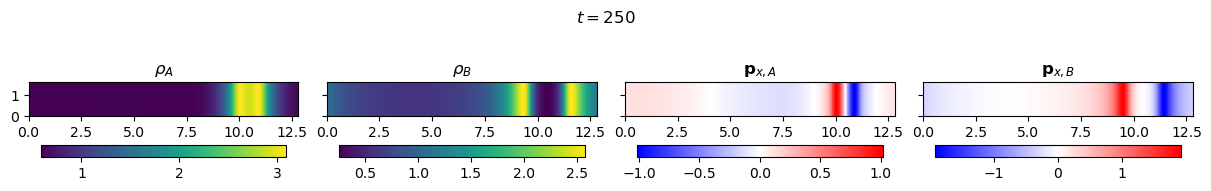

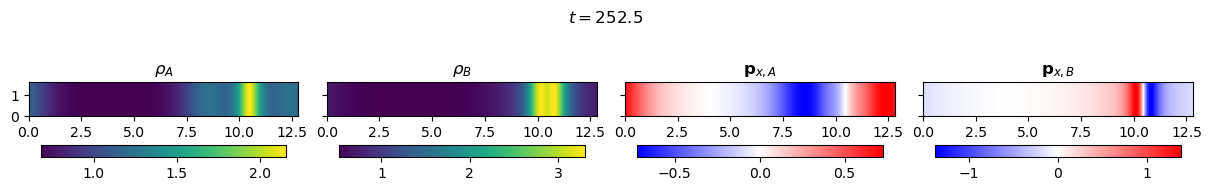

5000 0.5179267710775706 3.297216083475077 0.9999683596812372


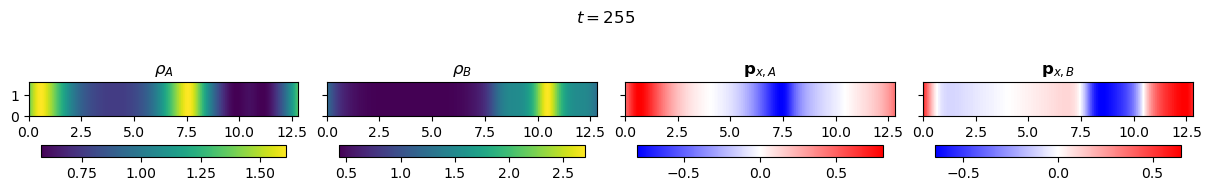

10000 0.42889246290135197 2.6951068243328056 0.9999683596812372


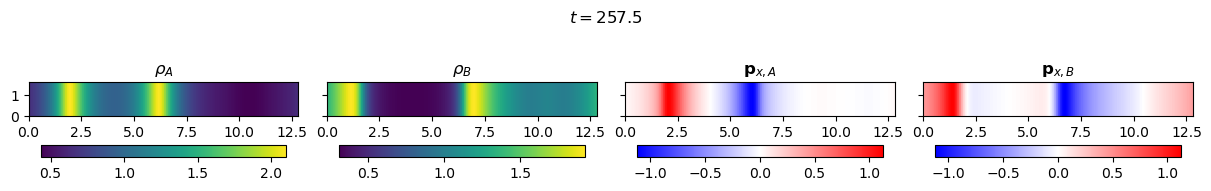

15000 0.3079596958118577 2.103078151082857 0.9999683596812372


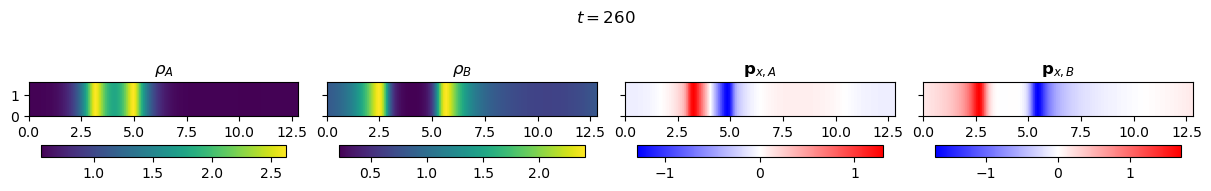

20000 0.21652331949585657 2.6342153729604054 0.9999683596812372


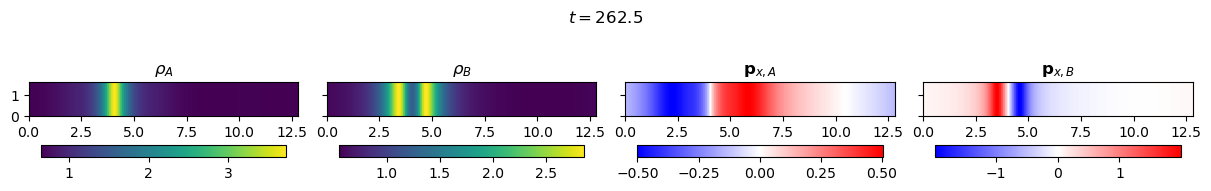

25000 0.5452634542616348 3.7364402735107816 0.9999683596812372


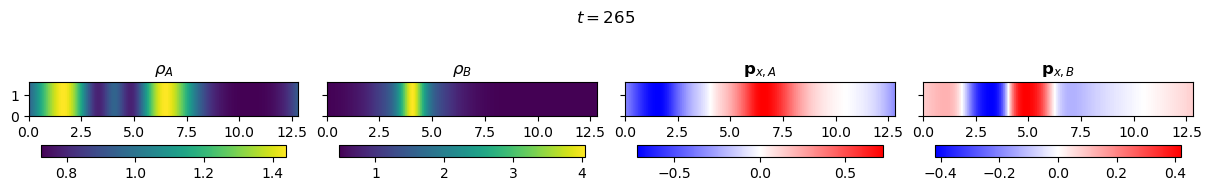

30000 0.4683418640596358 4.033250040875507 0.9999683596812372


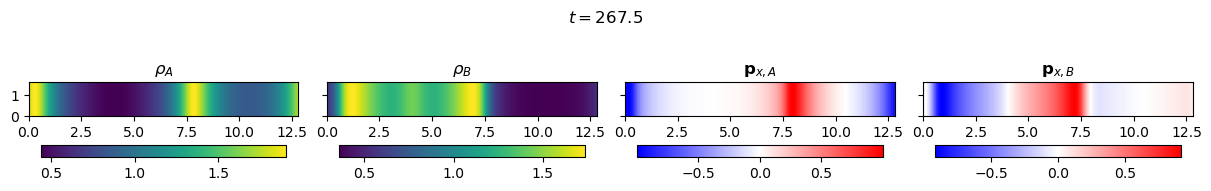

35000 0.3559584763997363 1.9065492782333424 0.9999683596812372


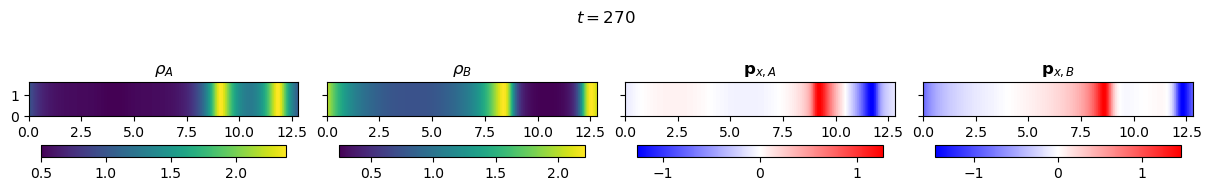

40000 0.24197655375455984 2.38973407915034 0.9999683596812372


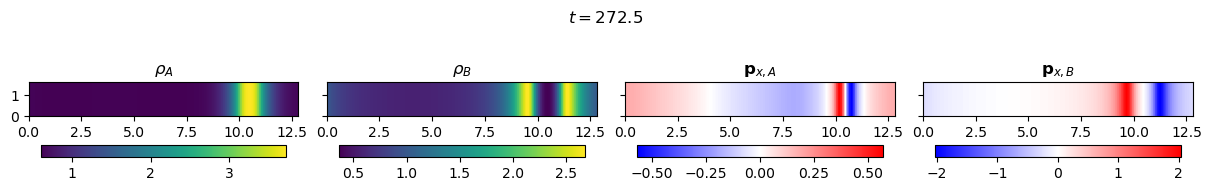

45000 0.3613767402869335 3.72475750313097 0.9999683596812372


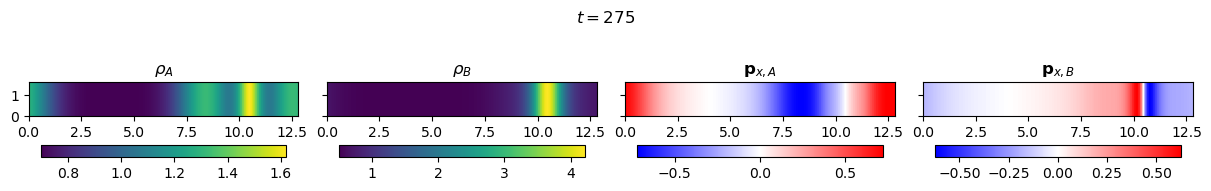

50000 0.5033926321942712 4.205702341934049 0.9999683596812372


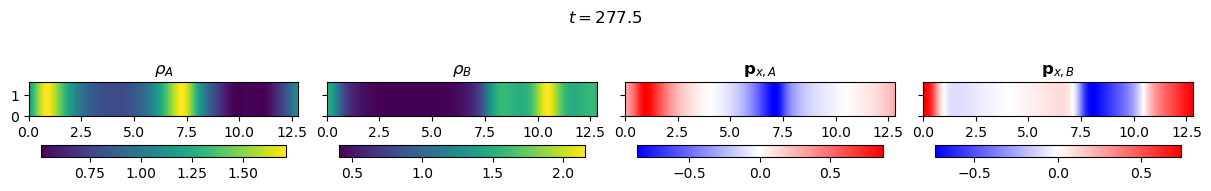

55000 0.4052541670461466 2.152238558149972 0.9999683596812372


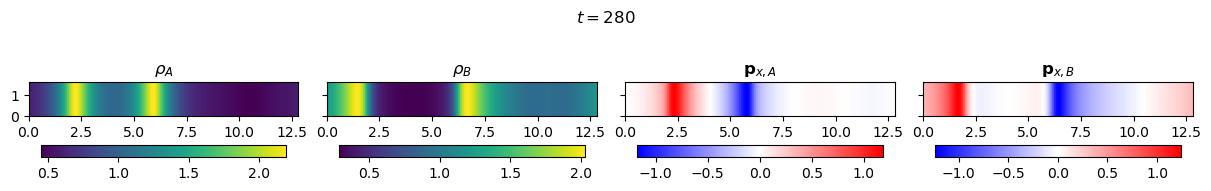

60000 0.28403464155449143 2.1944444067250304 0.9999683596812372


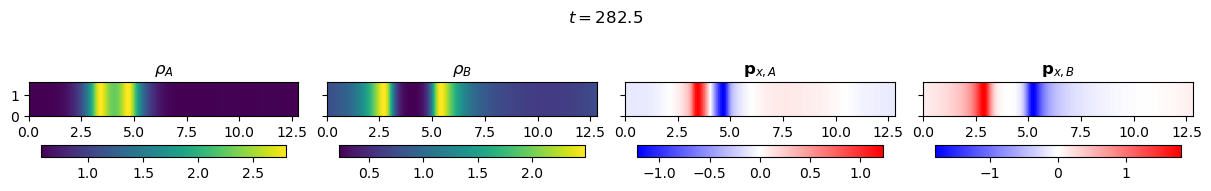

65000 0.21923455665293062 2.8001726697319924 0.9999683596812372


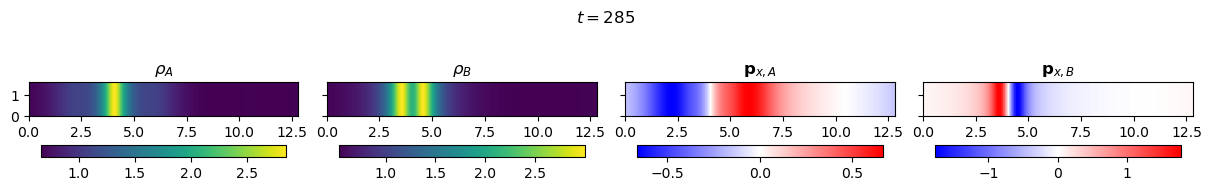

70000 0.5308840713988308 2.9948806233237772 0.9999683596812372


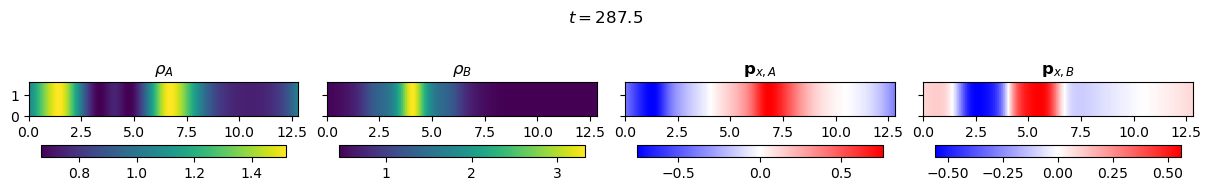

75000 0.44853871621128194 3.3165943954726735 0.9999683596812372


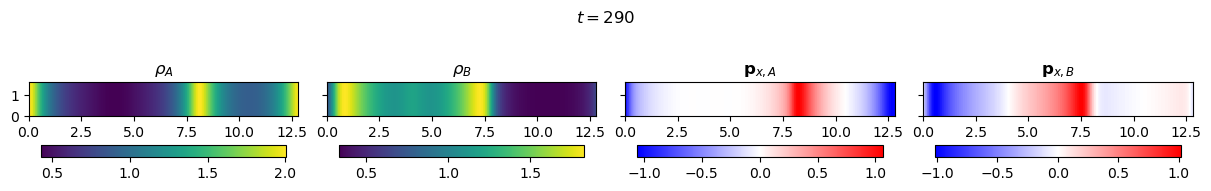

80000 0.3309150231134553 2.0059983537806794 0.9999683596812372


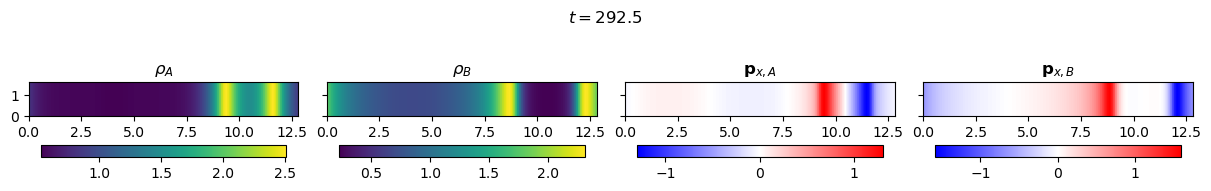

85000 0.22547546549444025 2.5093566023813487 0.9999683596812372


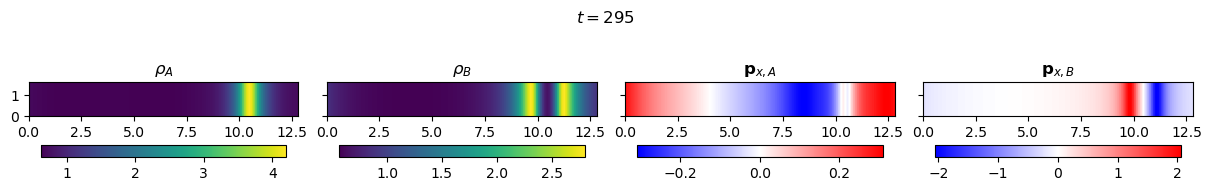

90000 0.5597013815629719 4.204580044848147 0.9999683596812372


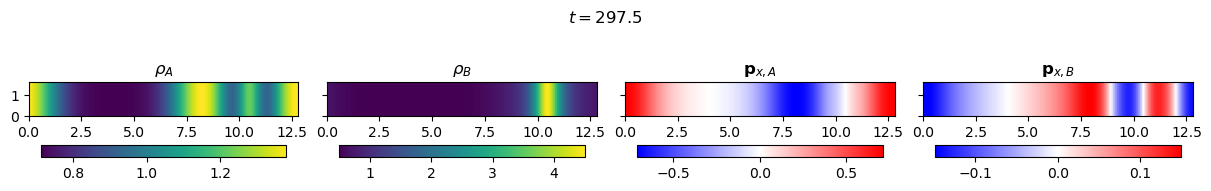

95000 0.48612596540049413 4.500415270103018 0.9999683596812372


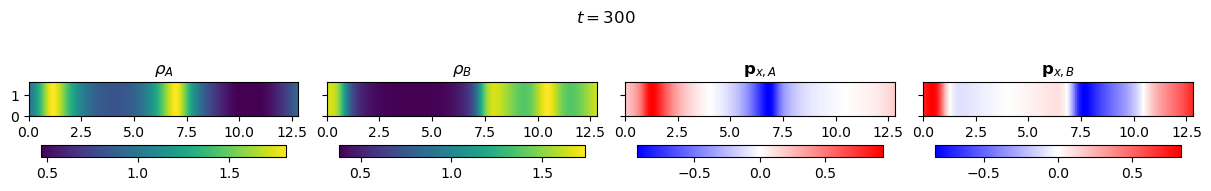

100000 0.37976135826179225 1.8135515326662808 0.9999683596812372


In [12]:
n_step = 100000
dn_out = 5000

# run_exEulerFS_dealiased(n_step, dn_out, mode="resume", w_NL_g=True)
# run_exEulerFS(n_step, dn_out, mode="resume", w_NL_g=True)
# run_simFS1(n_step, dn_out, mode="resume", w_NL_g=True)

# run_AB2(n_step, dn_out, mode="resume", w_NL_g=True)

run_RK4(n_step, dn_out, mode="resume", w_NL_g=True)
# run_simEulerFS(n_step, dn_out, mode="resume", w_NL_g=True)
